<a href="https://colab.research.google.com/github/eznrr/projeto-sentiment140/blob/main/Feature_engineering_sentment140.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

> Neste notebook, iremos explorar os príncipais recusos das bibliotecas de visualização do Python, **Seaborn** e **MatPlotlib**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google import colab
colab.drive.mount('/content/drive')

Mounted at /content/drive


- Importando o DataFrame limpo

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projeto-oficina-sentiment140/DataFrame/sentiment_limpo.csv') # Coloque o caminho do seu DataFrame limpo

# Feature Engineering

> Consiste na criação de novas colunas a partir de colunas já existentes no DataFrame.

> A criação delas, visam uma melhor explicação dos dados e a criação de mais informações para um melhor treinamento do modelo.

In [ ]:
df.dtypes

,0
target,int64
id,int64
date,object
user,object
text,object
clean_text,object


- Primeiro, vamos verificar se não ficou nenhuma linha com dados faltantes.

In [ ]:
df['clean_text'].value_counts(dropna=False)

,count
clean_text,
NaN,7437
thanks,2361
thank,1587
get 100 followers day using add everyone train pay vip,1484
good morning,1140
...,...
awwjust tad far meetup pictures zune,1
hate finding things hard way,1
wish ice cream,1


In [ ]:
# Removendo os valores nulos
df.dropna(subset=['clean_text'], inplace=True)

In [ ]:
df['clean_text'].value_counts(dropna=False)

,count
clean_text,
thanks,2361
thank,1587
get 100 followers day using add everyone train pay vip,1484
good morning,1140
miss,798
...,...
awwjust tad far meetup pictures zune,1
hate finding things hard way,1
wish ice cream,1


In [ ]:
df.shape

(1592562, 6)

> Agora podemos criar uma nova coluna contendo a largura dos tweets!

In [ ]:
df['tweet_length'] = df['clean_text'].apply(len)

In [ ]:
df.head()

,target,id,date,user,text,clean_text,tweet_length
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his Facebook by t...,upset cant update facebook texting might cry r...,74
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,I dived many times for the ball Managed to sa...,dived many times ball managed save 50 rest go ...,52
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,32
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,no its not behaving at all im mad why am i he...,behaving im mad cant see,24
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,not the whole crew,whole crew,10


# Visualização em Gráficos

> Como no notebook passado, iremos visualizar as informações mais relevantes do nosso DataFrame.

> Informações como a destribuição de categorias, palavras e largura do texto são nossos objetivos.

## Distribuição de Classes

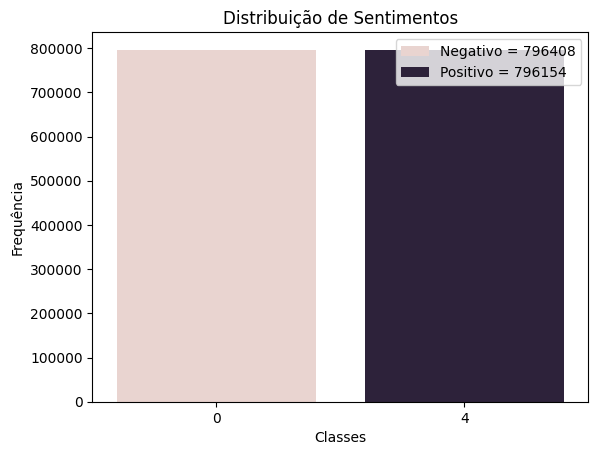

In [ ]:
sns.countplot(x='target', hue='target', data=df)
plt.title('Distribuição de Sentimentos')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.legend(labels=[f'Negativo = {len(df[df["target"] == 0])}',
                   f'Positivo = {len(df[df["target"] == 4])}'])
plt.show()

## Distribuição de Texto

- Distribuição da largura de tweets **negativos**

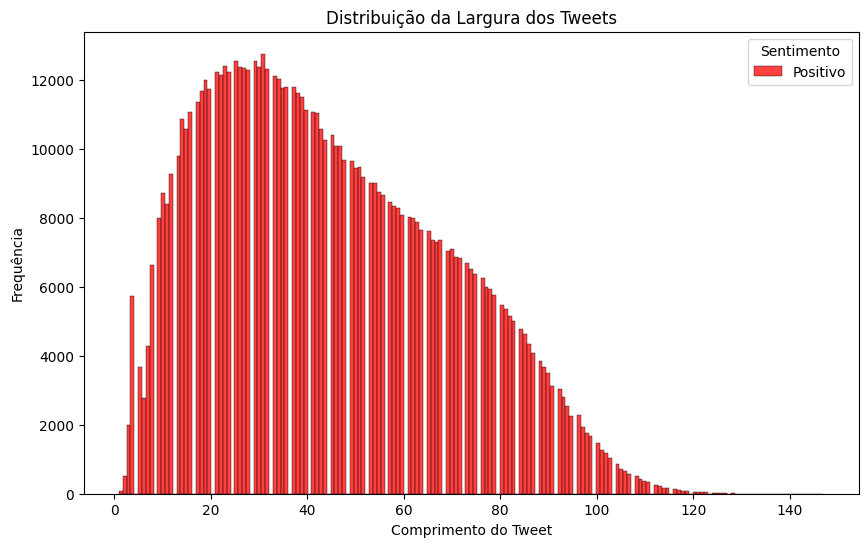

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df[df['target']==0], x = 'tweet_length', color='red',
             label = 'Positivo')
plt.title('Distribuição da Largura dos Tweets')
plt.xlabel('Comprimento do Tweet')
plt.ylabel('Frequência')
plt.legend(title='Sentimento')
plt.show()

- Distribuição da largura de teets **positivos**

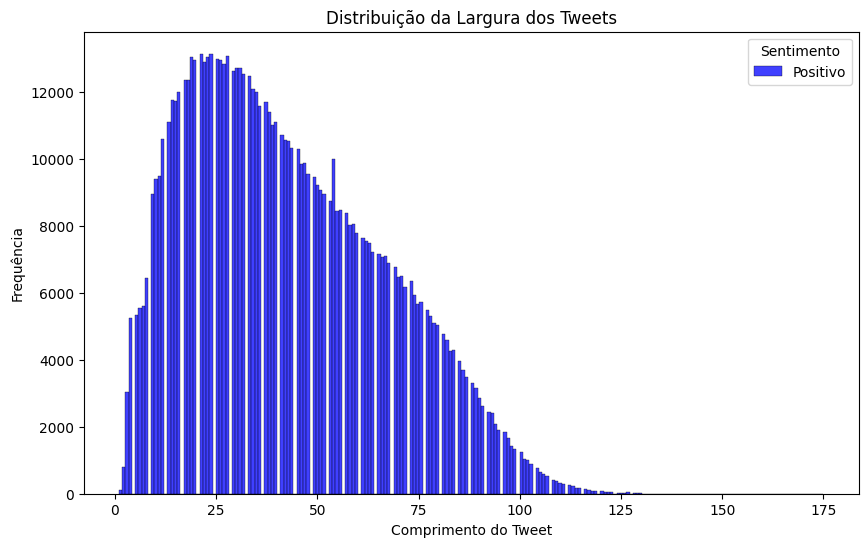

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df[df['target']==4], x = 'tweet_length', color='blue',
             label = 'Positivo')
plt.title('Distribuição da Largura dos Tweets')
plt.xlabel('Comprimento do Tweet')
plt.ylabel('Frequência')
plt.legend(title='Sentimento')
plt.show()

## Nuvem de Palavras

> Aqui será possível observar as palavras com mais frequência

In [ ]:
from wordcloud import WordCloud

# Definindo uma string com as palavras positivas e negativas
palavras_positivas = ' '.join(df[df['target']==4]['clean_text'])
palavras_negativas = ' '.join(df[df['target']==0]['clean_text'])

# Aplicando a biblioteca
nuvem_positiva = WordCloud(width=800, height=400, background_color='white').generate(palavras_positivas)
nuvem_negativa = WordCloud(width=800, height=400, background_color='black').generate(palavras_negativas)

- Exibindo a nuvem **positiva**

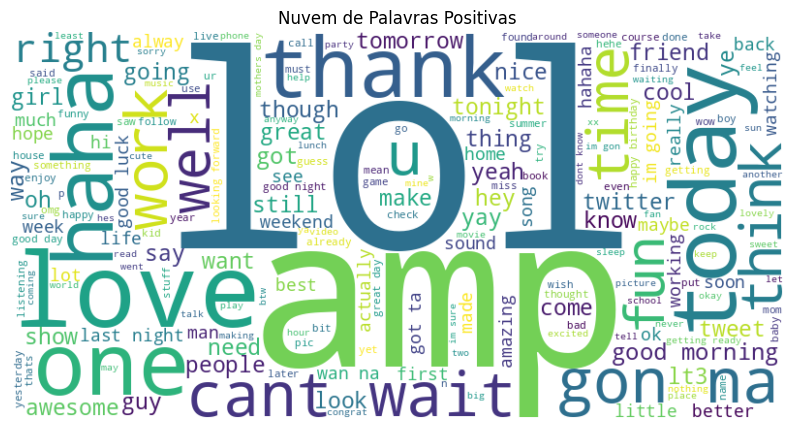

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(nuvem_positiva, interpolation='bilinear')
plt.axis('off') # remove as bordas
plt.title('Nuvem de Palavras Positivas')
plt.show()

- Exibindo a nuvem **negativa**

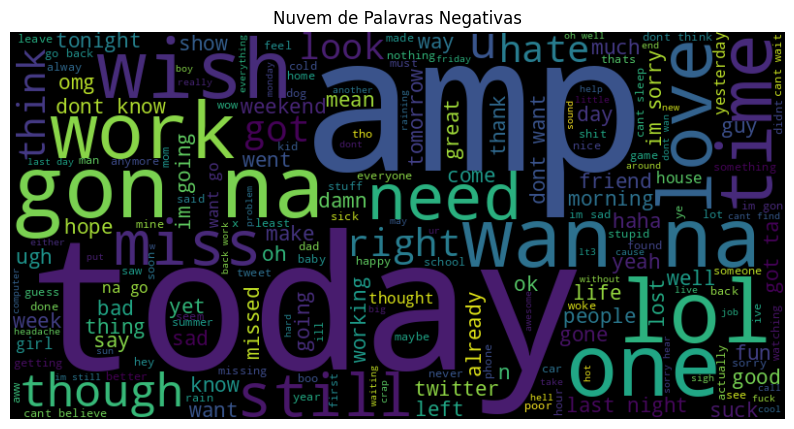

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(nuvem_negativa, interpolation='bilinear')
plt.axis('off') # remove as bordas
plt.title('Nuvem de Palavras Negativas')
plt.show()

## Tamanho do Texto e Sentimento

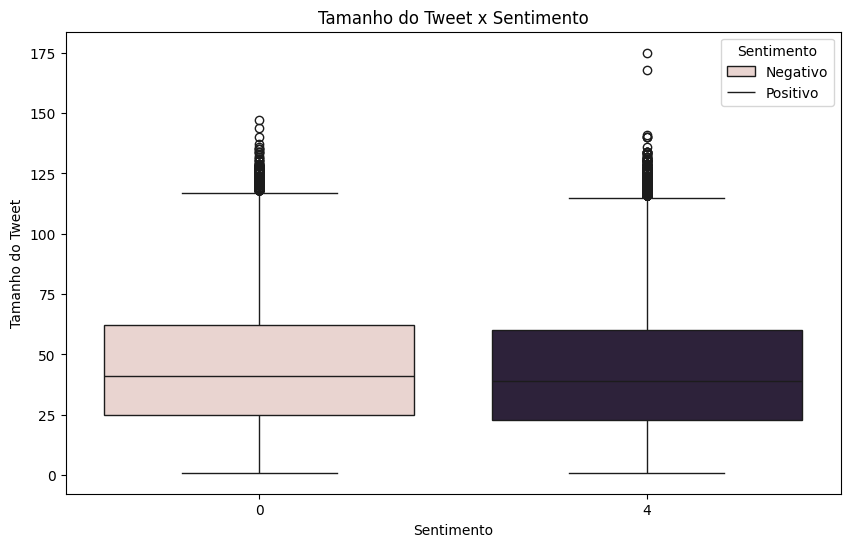

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='tweet_length', hue='target')
plt.title('Tamanho do Tweet x Sentimento')
plt.ylabel('Tamanho do Tweet')
plt.xlabel('Sentimento')
plt.legend(labels=['Negativo', 'Positivo'], title='Sentimento')
plt.show()